In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('M:\\projects\OnlineRetailDataset\Online Retail Data Set.xlsx')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
C:\Users\nnahi\AppData\Local\Temp\ipykernel_7276\2393555214.py:1: SyntaxWarning: invalid escape sequence '\O'
  df = pd.read_excel('M:\\projects\OnlineRetailDataset\Online Retail Data Set.xlsx')


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

### As the dataset size is 541909 and  duplicate values are very low compare to that, dropping those won't have any negative effect

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
missing_values = df.isnull().sum()
nan_values = df.isna().sum()
duplicates = df.duplicated().sum()
unique_values = df.nunique()

columns = pd.DataFrame({
    "missing_values": missing_values,
    "nan_values": nan_values,
    "duplicates": duplicates,
    "unique_values": unique_values,
})

columns

missing_values  nan_values  duplicates  unique_values
InvoiceNo                 0           0        5268          25900
StockCode                 0           0        5268           4070
Description            1454        1454        5268           4223
Quantity                  0           0        5268            722
InvoiceDate               0           0        5268          23260
UnitPrice                 0           0        5268           1630
CustomerID           135080      135080        5268           4372
Country                   0           0        5268             38

In [5]:
df = df.drop_duplicates()

In [6]:
df['Year']= df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Time'] = df['InvoiceDate'].dt.time
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Year     Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   

         Day      Time  
0  Wednesday  08:26:00  
1  Wednesday  08:26:00  
2  Wednesday  08:26:00  
3  Wednesday  08:26:00  
4  Wednesday  08:26:00

In [7]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Year     Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   

         Day      Time  TotalSales  
0  Wednesday  08:26:00       15.30  
1  Wednesday  08:26:00       20.34  
2  Wednesday  08:26:00       22.00  
3  Wednesday  08:26:00       20.34  
4  Wednesday  08:26:00       20.34

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='UnitPrice'>

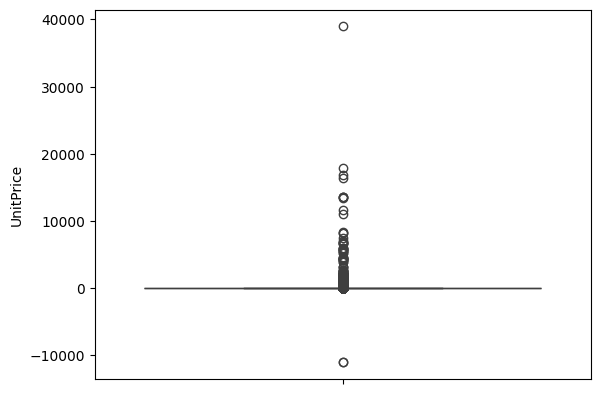

In [9]:
sns.boxplot(y='UnitPrice', data=df)

In [10]:
df[df['UnitPrice'] == 0].count()

InvoiceNo      2510
StockCode      2510
Description    1056
Quantity       2510
InvoiceDate    2510
UnitPrice      2510
CustomerID       40
Country        2510
Year           2510
Month          2510
Day            2510
Time           2510
TotalSales     2510
dtype: int64

In [11]:
df[df['UnitPrice'] < 0].count()

InvoiceNo      2
StockCode      2
Description    2
Quantity       2
InvoiceDate    2
UnitPrice      2
CustomerID     0
Country        2
Year           2
Month          2
Day            2
Time           2
TotalSales     2
dtype: int64

<Axes: ylabel='Quantity'>

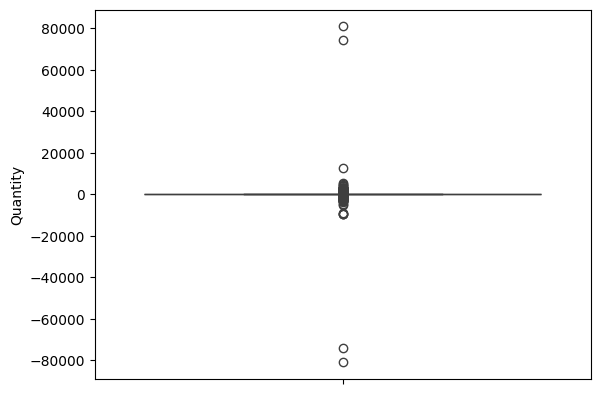

In [12]:
sns.boxplot(y='Quantity', data=df)

In [13]:
df[df['Quantity'] == 0].count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Year           0
Month          0
Day            0
Time           0
TotalSales     0
dtype: int64

In [14]:
df[df['Quantity'] < 0].count()

InvoiceNo      10587
StockCode      10587
Description     9725
Quantity       10587
InvoiceDate    10587
UnitPrice      10587
CustomerID      8872
Country        10587
Year           10587
Month          10587
Day            10587
Time           10587
TotalSales     10587
dtype: int64

In [15]:
df[df['Quantity'] < 0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  Year  \
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  2010   
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  2010   
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  2010   
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010   
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010   
...                    ...        ...         ...             ...   ...   
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  2011   
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  2011   
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  2011   
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  2011   
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  2011   

           Month        Day      Time  TotalSales  
141     December  Wednesday  09:41:00      -27.50  
154     December  Wednesday  09:49:00       -4.65  
235     December  Wednesday  10:24:00      -19.80  
236     December  Wednesday  10:24:00       -6.96  
237     December  Wednesday  10:24:00       -6.96  
...          ...        ...       ...         ...  
540449  December     Friday  09:57:00       -9.13  
541541  December     Friday  10:28:00     -224.69  
541715  December     Friday  11:57:00      -54.75  
541716  December     Friday  11:58:00       -1.25  
541717  December     Friday  11:58:00       -6.25  

[10587 rows x 13 columns]

### There could be two reasons for negative values:
 1. Those are newly purchased products.
 2. Those are cancelled products.
As this is a retail dataset, we can consider the 2nd point

In [16]:
cancelled_order = df[df['Quantity'] < 0]
retail_order  = df[df['Quantity'] > 0]

In [17]:
retail_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526054 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526054 non-null  object        
 1   StockCode    526054 non-null  object        
 2   Description  525462 non-null  object        
 3   Quantity     526054 non-null  int64         
 4   InvoiceDate  526054 non-null  datetime64[ns]
 5   UnitPrice    526054 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      526054 non-null  object        
 8   Year         526054 non-null  int32         
 9   Month        526054 non-null  object        
 10  Day          526054 non-null  object        
 11  Time         526054 non-null  object        
 12  TotalSales   526054 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)
memory usage: 54.2+ MB


In [18]:
retail_order.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Year     Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   

         Day      Time  TotalSales  
0  Wednesday  08:26:00       15.30  
1  Wednesday  08:26:00       20.34  
2  Wednesday  08:26:00       22.00  
3  Wednesday  08:26:00       20.34  
4  Wednesday  08:26:00       20.34

<Axes: ylabel='UnitPrice'>

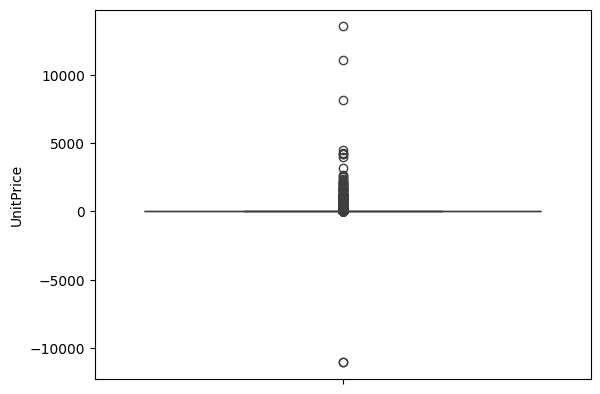

In [19]:
sns.boxplot(y='UnitPrice', data=retail_order)

<Axes: ylabel='Quantity'>

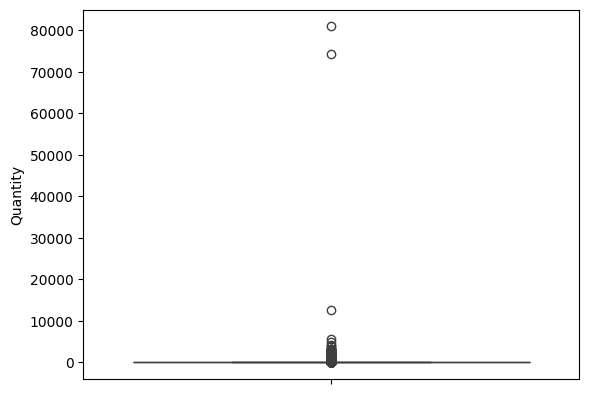

In [20]:
sns.boxplot(y='Quantity', data=retail_order)

In [21]:
retail_order[retail_order['UnitPrice'] == 0]

InvoiceNo StockCode                   Description  Quantity  \
622       536414     22139                           NaN        56   
1970      536545     21134                           NaN         1   
1971      536546     22145                           NaN         1   
1972      536547     37509                           NaN         1   
1987      536549    85226A                           NaN         1   
...          ...       ...                           ...       ...   
535334    581211     22142                         check        14   
536981    581234     72817                           NaN        27   
538504    581406    46000M  POLYESTER FILLER PAD 45x45cm       240   
538505    581406    46000S  POLYESTER FILLER PAD 40x40cm       300   
538554    581408     85175                           NaN        20   

               InvoiceDate  UnitPrice  CustomerID         Country  Year  \
622    2010-12-01 11:52:00        0.0         NaN  United Kingdom  2010   
1970   2010-12-01 14:32:00        0.0         NaN  United Kingdom  2010   
1971   2010-12-01 14:33:00        0.0         NaN  United Kingdom  2010   
1972   2010-12-01 14:33:00        0.0         NaN  United Kingdom  2010   
1987   2010-12-01 14:34:00        0.0         NaN  United Kingdom  2010   
...                    ...        ...         ...             ...   ...   
535334 2011-12-07 18:36:00        0.0         NaN  United Kingdom  2011   
536981 2011-12-08 10:33:00        0.0         NaN  United Kingdom  2011   
538504 2011-12-08 13:58:00        0.0         NaN  United Kingdom  2011   
538505 2011-12-08 13:58:00        0.0         NaN  United Kingdom  2011   
538554 2011-12-08 14:06:00        0.0         NaN  United Kingdom  2011   

           Month        Day      Time  TotalSales  
622     December  Wednesday  11:52:00         0.0  
1970    December  Wednesday  14:32:00         0.0  
1971    December  Wednesday  14:33:00         0.0  
1972    December  Wednesday  14:33:00         0.0  
1987    December  Wednesday  14:34:00         0.0  
...          ...        ...       ...         ...  
535334  December  Wednesday  18:36:00         0.0  
536981  December   Thursday  10:33:00         0.0  
538504  December   Thursday  13:58:00         0.0  
538505  December   Thursday  13:58:00         0.0  
538554  December   Thursday  14:06:00         0.0  

[1174 rows x 13 columns]

### November has highest sales enven though december occured twice

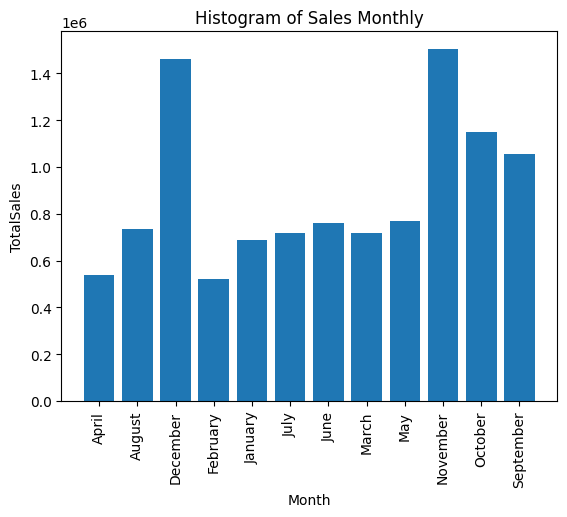

In [22]:
sales_by_month = retail_order.groupby('Month')['TotalSales'].sum()

months = sales_by_month.index
sales = sales_by_month.values

plt.bar(months, sales)

plt.title("Histogram of Sales Monthly")
plt.xlabel("Month")
plt.xticks(rotation='vertical')
plt.ylabel("TotalSales")

plt.show()

### Only 2010(December) 2011's sales are given

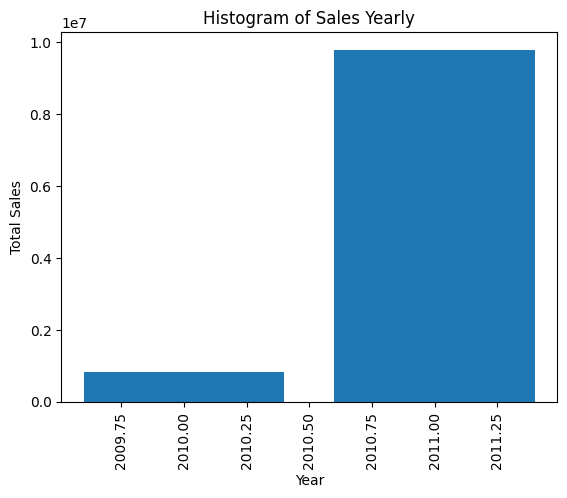

In [23]:
sales_by_year = retail_order.groupby('Year')['TotalSales'].sum()

years = sales_by_year.index
sales = sales_by_year.values

plt.bar(years, sales)

plt.title("Histogram of Sales Yearly")
plt.xlabel("Year")
plt.xticks(rotation='vertical')
plt.ylabel("Total Sales")

plt.show()

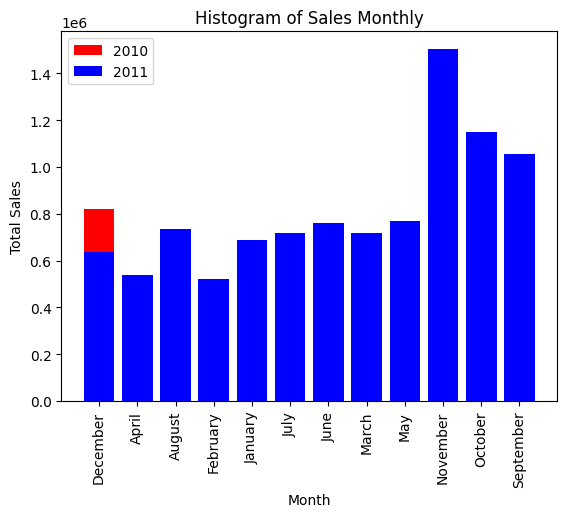

In [24]:
sales_2010 = retail_order[retail_order['Year']== 2010].groupby('Month')['TotalSales'].sum()
sales_2011 = retail_order[retail_order['Year']== 2011].groupby('Month')['TotalSales'].sum()

months_2010 = sales_2010.index
sales_2010 = sales_2010.values

months_2011 = sales_2011.index
sales_2011 = sales_2011.values

plt.bar(months_2010, sales_2010, label='2010', color='red')
plt.bar(months_2011, sales_2011, label='2011', color='blue')

plt.title("Histogram of Sales Monthly")
plt.xlabel("Month")
plt.xticks(rotation = 'vertical')
plt.ylabel("Total Sales")
plt.legend(loc='upper left')

plt.show()

### It seems Sunday which is a weekend has lowest sales compare to other days of a week

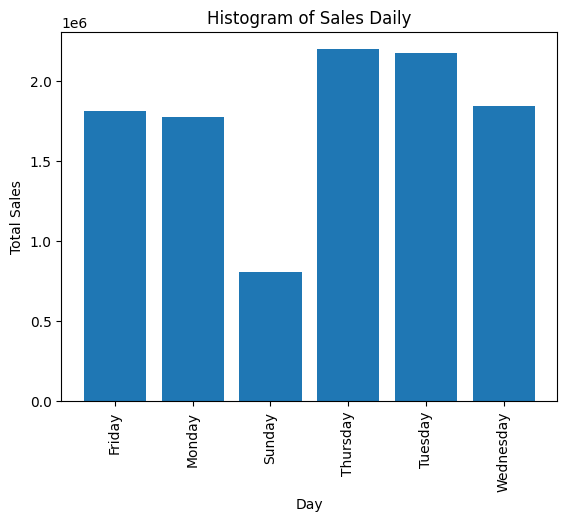

In [25]:
sales_by_day = retail_order.groupby('Day')['TotalSales'].sum()

days = sales_by_day.index
sales = sales_by_day.values

plt.bar(days, sales)

plt.title("Histogram of Sales Daily")
plt.xlabel("Day")
plt.xticks(rotation='vertical')
plt.ylabel("Total Sales")

plt.show()

### Most of the sales are from US

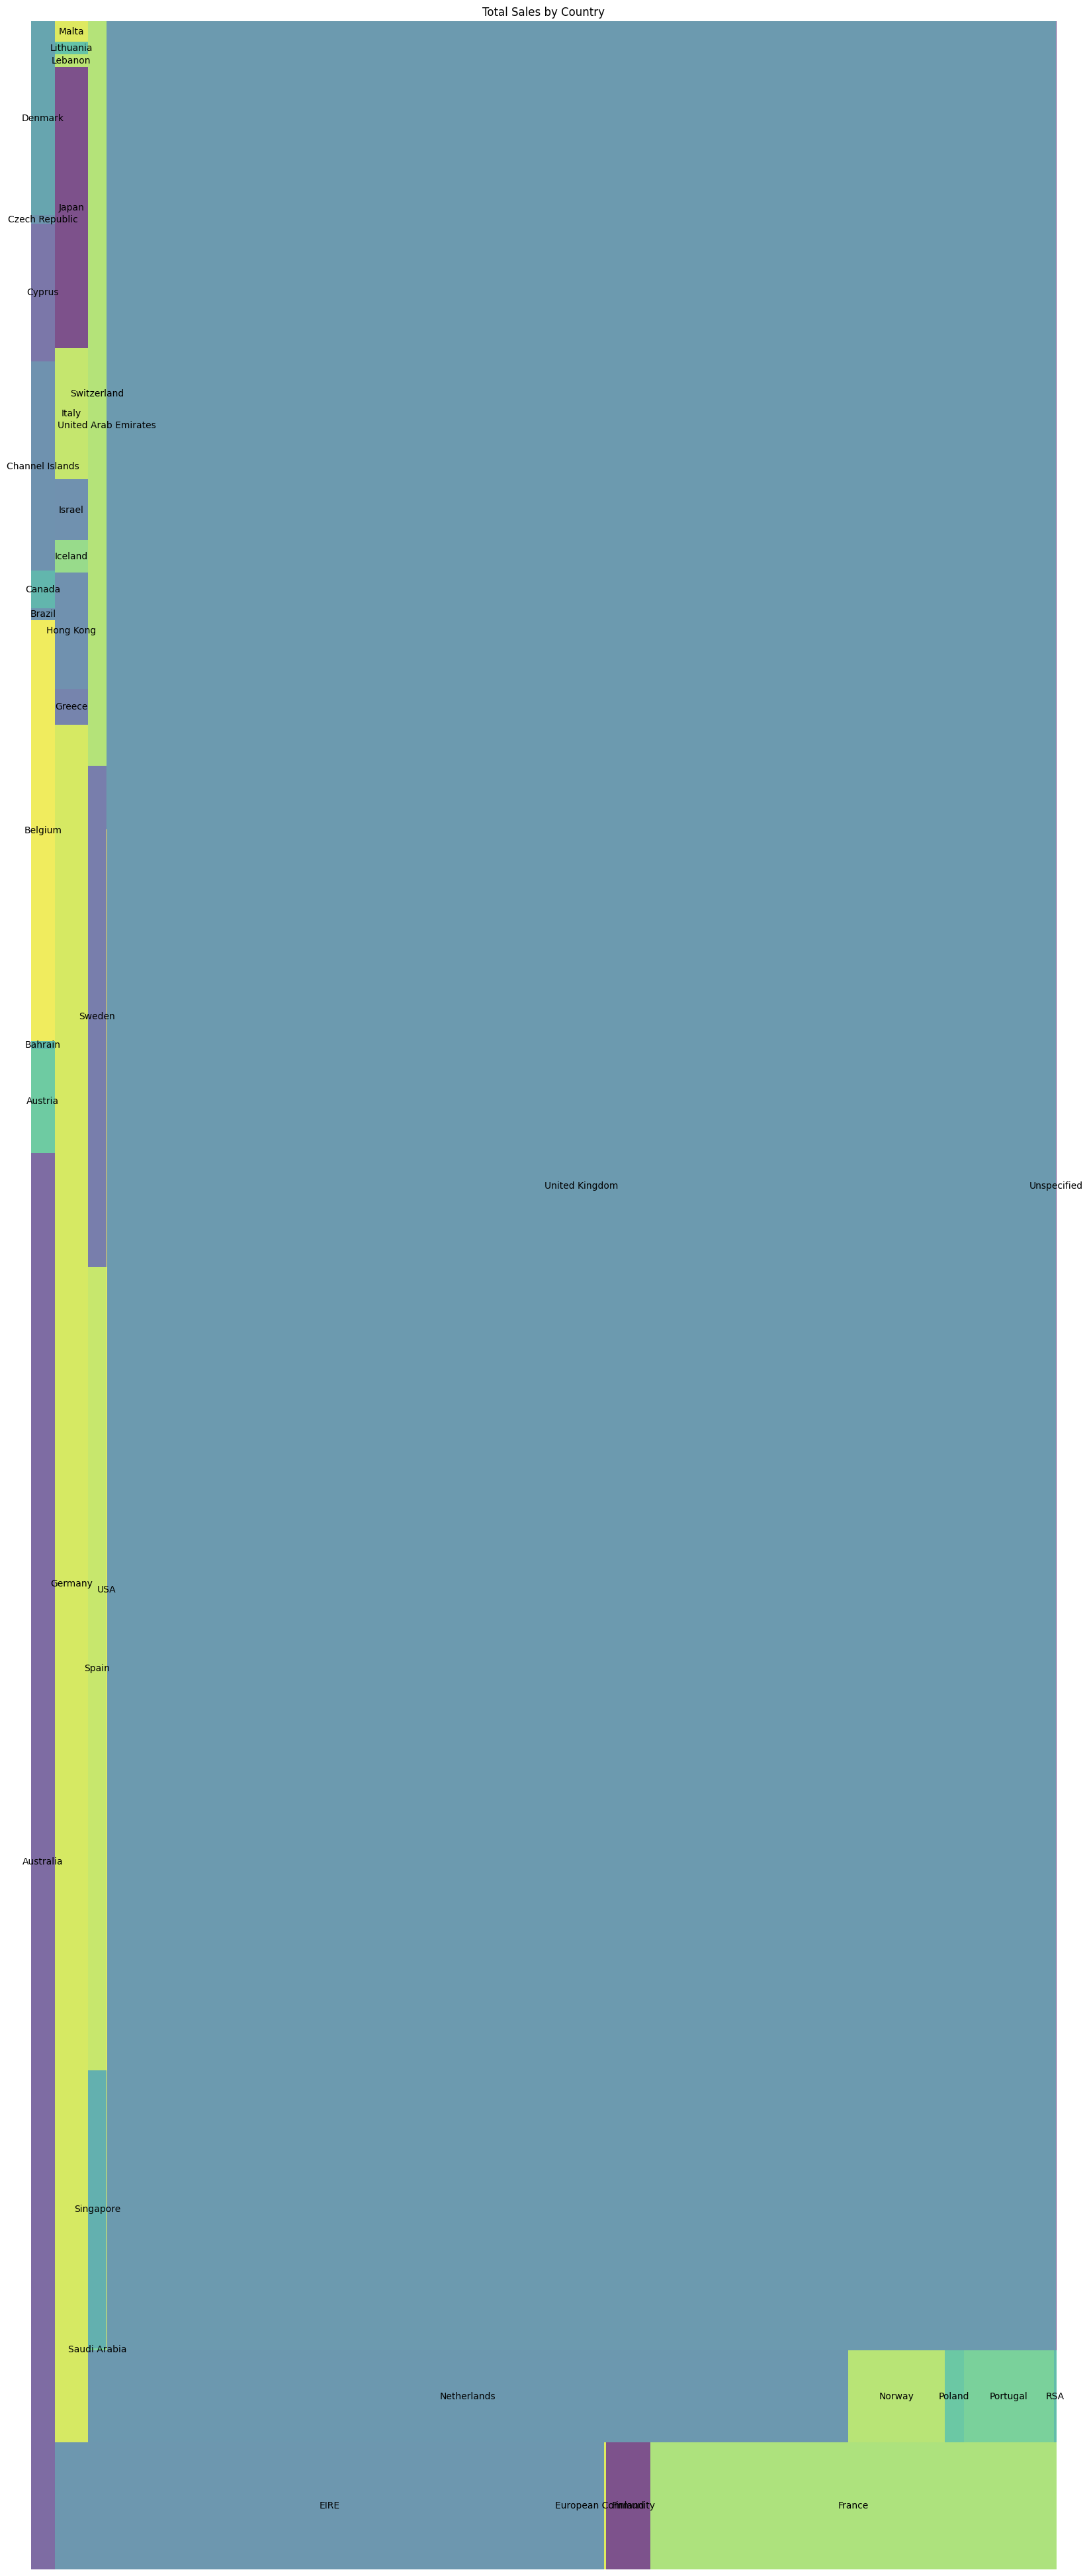

In [26]:
import squarify

sales_by_country = retail_order.groupby('Country')['TotalSales'].sum()

countries = sales_by_country.index
sales = sales_by_country.values


plt.figure(figsize=(20, 50))
squarify.plot(sizes=sales, label=countries, alpha=0.7)

plt.title("Total Sales by Country")
plt.axis('off')

plt.show()

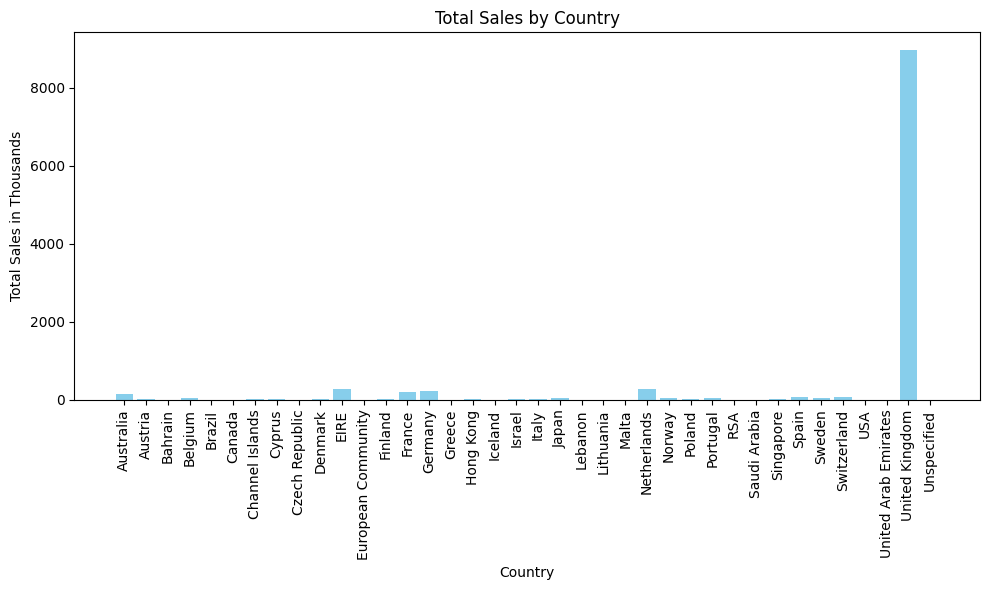

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(countries, sales/1000, color='skyblue')

plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.xticks(rotation='vertical')
plt.ylabel("Total Sales in Thousands")


plt.tight_layout()
plt.show()

In [28]:
retail_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526054 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526054 non-null  object        
 1   StockCode    526054 non-null  object        
 2   Description  525462 non-null  object        
 3   Quantity     526054 non-null  int64         
 4   InvoiceDate  526054 non-null  datetime64[ns]
 5   UnitPrice    526054 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      526054 non-null  object        
 8   Year         526054 non-null  int32         
 9   Month        526054 non-null  object        
 10  Day          526054 non-null  object        
 11  Time         526054 non-null  object        
 12  TotalSales   526054 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)
memory usage: 54.2+ MB


### It feels like 7 am has highest sales. Scenario is different when we calcualte Country and Monthwise.

In [29]:
retail_order['Hour'] = retail_order['InvoiceDate'].dt.hour

C:\Users\nnahi\AppData\Local\Temp\ipykernel_18300\3237439002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_order['Hour'] = retail_order['InvoiceDate'].dt.hour


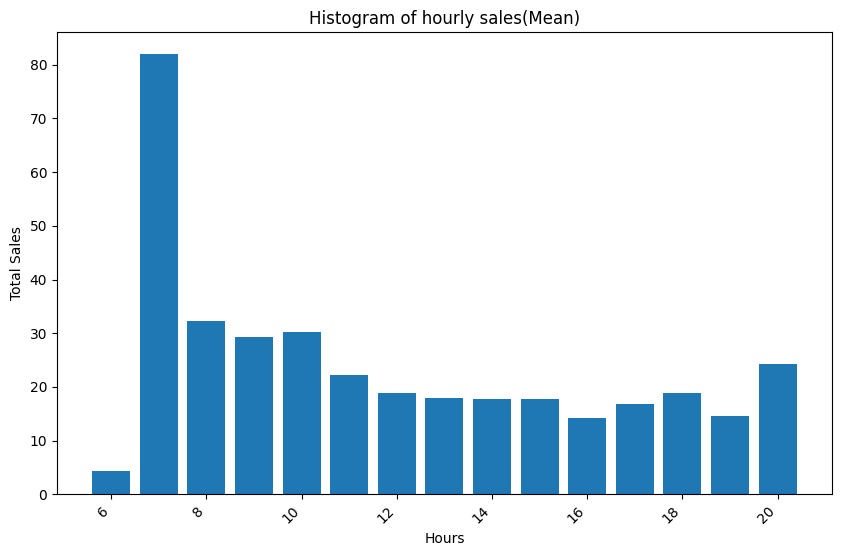

In [30]:
sales_by_hour = retail_order.groupby('Hour')['TotalSales'].mean()

hours = sales_by_hour.index
sales = sales_by_hour.values

plt.figure(figsize=(10, 6))
plt.bar(hours, sales)
plt.xlabel("Hours")
plt.ylabel("Total Sales")
plt.title("Histogram of hourly sales(Mean)")
plt.xticks(rotation=45, ha="right")
plt.show()

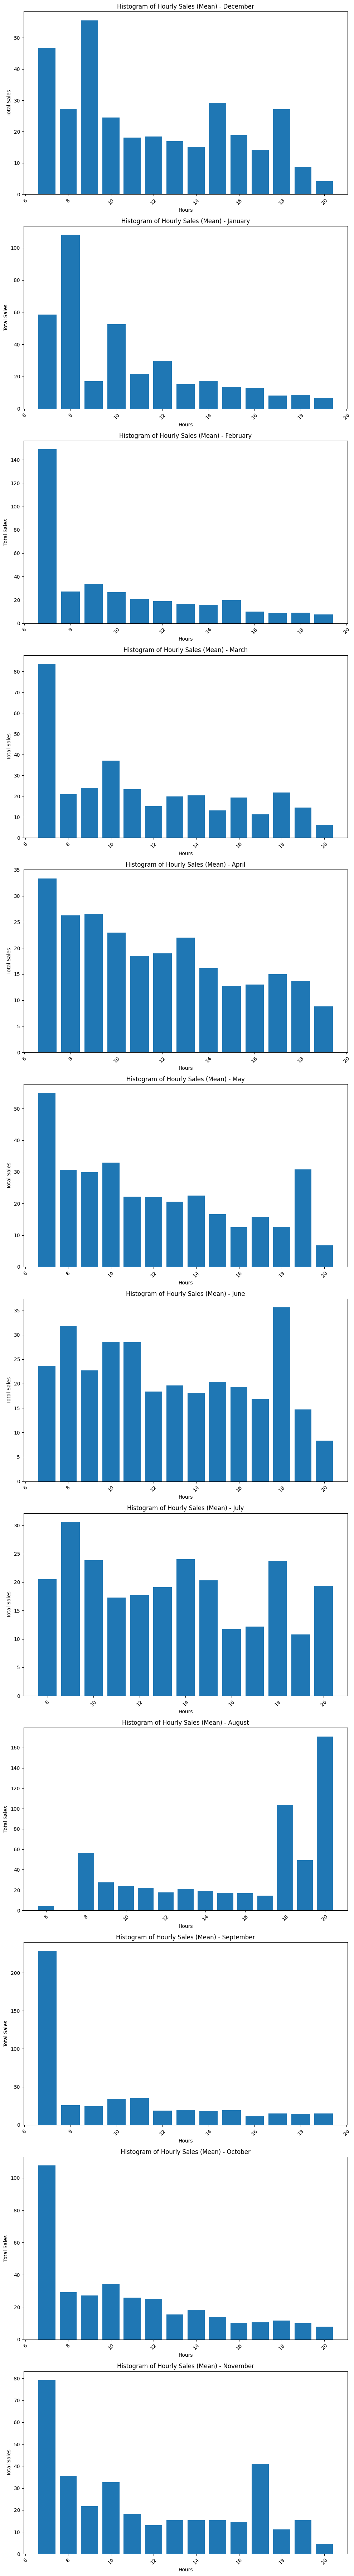

In [31]:
months = retail_order['Month'].unique()
num_plots = len(months)

fig, axs = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots))

for i, month in enumerate(months):
    month_data = retail_order[retail_order['Month'] == month]
    sales_by_hour_month = month_data.groupby('Hour')['TotalSales'].mean()
    
    hours_month = sales_by_hour_month.index
    sales_month = sales_by_hour_month.values
    
    # Creating a bar plot for the current month
    axs[i].bar(hours_month, sales_month)
    axs[i].set_xlabel("Hours")
    axs[i].set_ylabel("Total Sales")
    axs[i].set_title(f"Histogram of Hourly Sales (Mean) - {month}")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

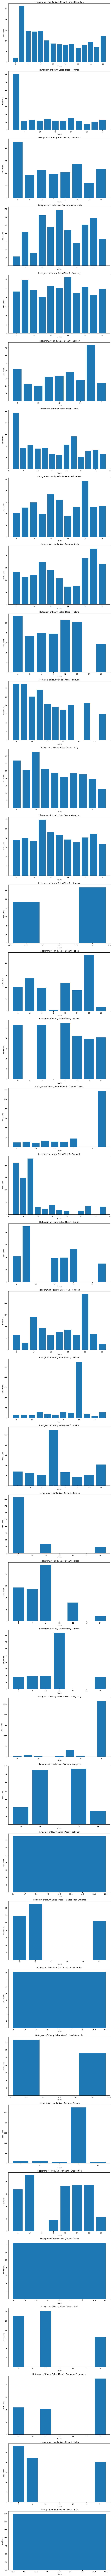

In [32]:
countries = retail_order['Country'].unique()
num_plots = len(countries)

fig, axs = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots))

for i, country in enumerate(countries):
    country_data = retail_order[retail_order['Country'] == country]
    sales_by_hour_country = country_data.groupby('Hour')['TotalSales'].mean()
    
    hours_country = sales_by_hour_country.index
    sales_country = sales_by_hour_country.values
    
    axs[i].bar(hours_country, sales_country)
    axs[i].set_xlabel("Hours")
    axs[i].set_ylabel("Total Sales")
    axs[i].set_title(f"Histogram of Hourly Sales (Mean) - {country}")
    axs[i].tick_params(axis='x')

plt.tight_layout()
plt.show()

### Different countries citizen has different product choice

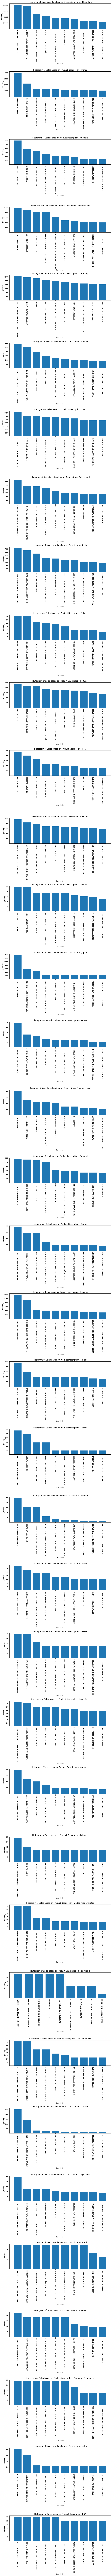

In [33]:
countries = retail_order['Country'].unique()
num_plots = len(countries)

fig, axs = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots))

for i, country in enumerate(countries):
    country_data = retail_order[retail_order['Country'] == country]
    sales_by_description_country = country_data.groupby('Description')['Quantity'].sum()

    top_10_sales_by_description_country = sales_by_description_country.sort_values(ascending=False).head(10)
    
    hours_country = top_10_sales_by_description_country.index
    sales_country = top_10_sales_by_description_country.values
    
    axs[i].bar(hours_country, sales_country)
    axs[i].set_xlabel("Description")
    axs[i].set_ylabel("Quantity")
    axs[i].set_title(f"Histogram of Sales based on Product Description - {country}")
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

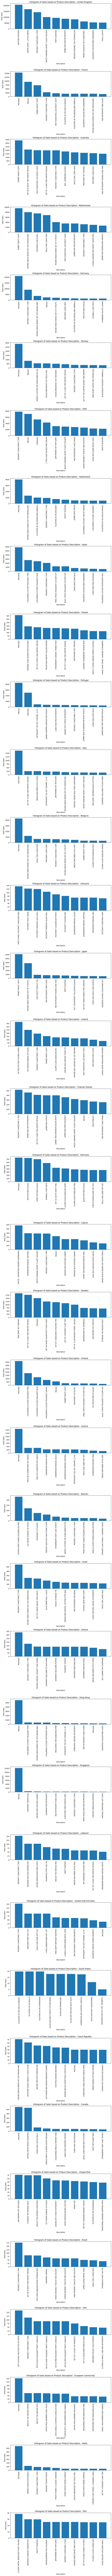

In [34]:
countries = retail_order['Country'].unique()
num_plots = len(countries)

fig, axs = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots))

for i, country in enumerate(countries):
    country_data = retail_order[retail_order['Country'] == country]
    sales_by_description_country = country_data.groupby('Description')['TotalSales'].sum()

    top_10_sales_by_description_country = sales_by_description_country.sort_values(ascending=False).head(10)
    
    hours_country = top_10_sales_by_description_country.index
    sales_country = top_10_sales_by_description_country.values
    
    axs[i].bar(hours_country, sales_country)
    axs[i].set_xlabel("Description")
    axs[i].set_ylabel("Total Sales")
    axs[i].set_title(f"Histogram of Sales based on Product Description - {country}")
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## Feature Engineering

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
 8   Year         536641 non-null  int32         
 9   Month        536641 non-null  object        
 10  Day          536641 non-null  object        
 11  Time         536641 non-null  object        
 12  TotalSales   536641 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)
memory usage: 55.3+ MB


In [3]:
df = df.drop_duplicates()

In [4]:
retail_order  = df[df['Quantity'] > 0]

In [30]:
retail_order['Year']= retail_order['InvoiceDate'].dt.year
retail_order['Month'] = retail_order['InvoiceDate'].dt.month_name()
retail_order['Day'] = retail_order['InvoiceDate'].dt.day_name()
retail_order['Hour'] = retail_order['InvoiceDate'].dt.hour
retail_order.head()

C:\Users\nnahi\AppData\Local\Temp\ipykernel_17388\2871987087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_order['Year']= retail_order['InvoiceDate'].dt.year
C:\Users\nnahi\AppData\Local\Temp\ipykernel_17388\2871987087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_order['Month'] = retail_order['InvoiceDate'].dt.month_name()
C:\Users\nnahi\AppData\Local\Temp\ipykernel_17388\2871987087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Year     Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   

         Day  Hour  
0  Wednesday     8  
1  Wednesday     8  
2  Wednesday     8  
3  Wednesday     8  
4  Wednesday     8

In [31]:
retail_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526054 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526054 non-null  object        
 1   StockCode    526054 non-null  object        
 2   Description  525462 non-null  object        
 3   Quantity     526054 non-null  int64         
 4   InvoiceDate  526054 non-null  datetime64[ns]
 5   UnitPrice    526054 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      526054 non-null  object        
 8   Year         526054 non-null  int32         
 9   Month        526054 non-null  object        
 10  Day          526054 non-null  object        
 11  Hour         526054 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(6)
memory usage: 48.2+ MB


In [32]:
retail_order['CustomerID'] = retail_order['CustomerID'].fillna('Unknown')

C:\Users\nnahi\AppData\Local\Temp\ipykernel_17388\4260540678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_order['CustomerID'] = retail_order['CustomerID'].fillna('Unknown')


In [33]:
reference_date = retail_order['InvoiceDate'].max()

recency_df = retail_order.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (reference_date - recency_df['InvoiceDate']).dt.days

In [34]:
recency_df.head()

CustomerID         InvoiceDate  Recency
0    12346.0 2011-01-18 10:01:00      325
1    12347.0 2011-12-07 15:52:00        1
2    12348.0 2011-09-25 13:13:00       74
3    12349.0 2011-11-21 09:51:00       18
4    12350.0 2011-02-02 16:01:00      309

In [35]:
frequency_df = retail_order.groupby('CustomerID').size().reset_index(name='Frequency')

In [37]:
retail_order['TotalSales'] = retail_order['Quantity'] * retail_order['UnitPrice']
monetary_df = retail_order.groupby('CustomerID')['TotalSales'].sum().reset_index()

# Merge Recency, Frequency, and Monetary Value metrics
rfm_df = pd.merge(recency_df, frequency_df, on='CustomerID')
rfm_df = pd.merge(rfm_df, monetary_df, on='CustomerID')

rfm_df.head()

C:\Users\nnahi\AppData\Local\Temp\ipykernel_17388\3745574112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_order['TotalSales'] = retail_order['Quantity'] * retail_order['UnitPrice']


CustomerID         InvoiceDate  Recency  Frequency  TotalSales
0    12346.0 2011-01-18 10:01:00      325          1    77183.60
1    12347.0 2011-12-07 15:52:00        1        182     4310.00
2    12348.0 2011-09-25 13:13:00       74         31     1797.24
3    12349.0 2011-11-21 09:51:00       18         73     1757.55
4    12350.0 2011-02-02 16:01:00      309         17      334.40

In [41]:
rfm_df.tail()

CustomerID         InvoiceDate  Recency  Frequency  TotalSales
4334    18280.0 2011-03-07 09:52:00      277         10      180.60
4335    18281.0 2011-06-12 10:53:00      180          7       80.82
4336    18282.0 2011-12-02 11:43:00        7         12      178.05
4337    18283.0 2011-12-06 12:02:00        3        721     2045.53
4338    18287.0 2011-10-28 09:29:00       42         70     1837.28

In [39]:
retail_order[retail_order['CustomerID'] == 'Unknown'].count()

InvoiceNo      133322
StockCode      133322
Description    132730
Quantity       133322
InvoiceDate    133322
UnitPrice      133322
CustomerID     133322
Country        133322
Year           133322
Month          133322
Day            133322
Hour           133322
TotalSales     133322
dtype: int64

In [40]:
mask = rfm_df['CustomerID'] == 'Unknown'
rfm_df = rfm_df[~mask]
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 0 to 4338
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   4339 non-null   object        
 1   InvoiceDate  4339 non-null   datetime64[ns]
 2   Recency      4339 non-null   int64         
 3   Frequency    4339 non-null   int64         
 4   TotalSales   4339 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 203.4+ KB


In [45]:
retail_order = retail_order.drop(['InvoiceDate', 'InvoiceNo', 'StockCode', 'UnitPrice', 'TotalSales'], axis='columns')
retail_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526054 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Description  525462 non-null  object
 1   Quantity     526054 non-null  int64 
 2   CustomerID   526054 non-null  object
 3   Country      526054 non-null  object
 4   Year         526054 non-null  int32 
 5   Month        526054 non-null  object
 6   Day          526054 non-null  object
 7   Hour         526054 non-null  int32 
dtypes: int32(2), int64(1), object(5)
memory usage: 32.1+ MB


In [49]:
retail_order['Description'].describe()

count                                 525462
unique                                  4072
top       white hanging heart t-light holder
freq                                    2315
Name: Description, dtype: object

In [5]:
retail_order['Description'] = retail_order['Description'].fillna("Unknown")

C:\Users\nnahi\AppData\Local\Temp\ipykernel_7276\2388107270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_order['Description'] = retail_order['Description'].fillna("Unknown")


In [6]:
retail_order['Description'] = retail_order['Description'].str.lower()

C:\Users\nnahi\AppData\Local\Temp\ipykernel_7276\2288392781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_order['Description'] = retail_order['Description'].str.lower()


In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [8]:
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(retail_order['Description'])
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

In [53]:
bow_df.head()

00  10  100  11  12  120cm  125g  15  15c  15cm  ...  wrecking  writing  \
0   0   0    0   0   0      0     0   0    0     0  ...         0        0   
1   0   0    0   0   0      0     0   0    0     0  ...         0        0   
2   0   0    0   0   0      0     0   0    0     0  ...         0        0   
3   0   0    0   0   0      0     0   0    0     0  ...         0        0   
4   0   0    0   0   0      0     0   0    0     0  ...         0        0   

   wrongly  xmas  yellow  you  your  yuletide  zero  zinc  
0        0     0       0    0     0         0     0     0  
1        0     0       0    0     0         0     0     0  
2        0     0       0    0     0         0     0     0  
3        0     0       0    0     0         0     0     0  
4        0     0       0    0     0         0     0     0  

[5 rows x 2206 columns]

In [54]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(retail_order['Description'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df.head()

00   10  100   11   12  120cm  125g   15  15c  15cm  ...  wrecking  \
0  0.0  0.0  0.0  0.0  0.0    0.0   0.0  0.0  0.0   0.0  ...       0.0   
1  0.0  0.0  0.0  0.0  0.0    0.0   0.0  0.0  0.0   0.0  ...       0.0   
2  0.0  0.0  0.0  0.0  0.0    0.0   0.0  0.0  0.0   0.0  ...       0.0   
3  0.0  0.0  0.0  0.0  0.0    0.0   0.0  0.0  0.0   0.0  ...       0.0   
4  0.0  0.0  0.0  0.0  0.0    0.0   0.0  0.0  0.0   0.0  ...       0.0   

   writing  wrongly  xmas  yellow  you  your  yuletide  zero  zinc  
0      0.0      0.0   0.0     0.0  0.0   0.0       0.0   0.0   0.0  
1      0.0      0.0   0.0     0.0  0.0   0.0       0.0   0.0   0.0  
2      0.0      0.0   0.0     0.0  0.0   0.0       0.0   0.0   0.0  
3      0.0      0.0   0.0     0.0  0.0   0.0       0.0   0.0   0.0  
4      0.0      0.0   0.0     0.0  0.0   0.0       0.0   0.0   0.0  

[5 rows x 2206 columns]